In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from c_PatchDataset import PatchDataset
import matplotlib.pyplot as plt
import os
import numpy as np

In [12]:
batch_size = 32

data_dir = 'C:/Users/david/MT_code/data/extracted_patches/mutants_tensors'
labels_file = 'C:/Users/david/MT_code/data/fitness_dict_1500.npy'

In [13]:
data_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.ConvertImageDtype(torch.double)])

#label_transforms = transforms.Compose(
#    [transforms.ToTensor(),
#     transforms.ConvertImageDtype(torch.double)])

In [14]:
dataset = PatchDataset(labels_file = labels_file, data_dir = data_dir, 
                        transform = data_transforms)#, target_transform=label_transforms)

In [15]:
trainset, testset = torch.utils.data.random_split(dataset, [1200, 300])

In [16]:
trainloader = DataLoader(dataset = trainset, batch_size= batch_size, shuffle = True)
testloader = DataLoader(dataset = testset, batch_size= batch_size, shuffle = True)

In [17]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()                                                           #image is (16*72*10)
        self.conv1 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5,3))   #image becomes (32*68*8)
        self.pool1 = nn.MaxPool2d(kernel_size = (4,2), stride = (4,2))               #image becomes (32*17*4) 
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(6,3))   #image becomes (64*12*2)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)                       #image becomes (64*6*1)                                   
        self.fc1 = nn.Linear(64*6*1, 64)                                        
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = ConvNet()
model.double()

ConvNet(
  (conv1): Conv2d(16, 32, kernel_size=(5, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(4, 2), stride=(4, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(6, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=384, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

In [18]:
num_epochs = 100
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)#, momentum=0.9)

### Training the model: 

epoch 1, loss 3.130760
epoch 1, loss 3.915397
epoch 1, loss 3.059281
epoch 1, loss 3.879581
epoch 1, loss 3.047065
epoch 1, loss 3.037073
epoch 1, loss 2.197079
epoch 1, loss 2.190230
epoch 1, loss 3.320773
epoch 1, loss 3.974889
epoch 1, loss 4.371895
epoch 1, loss 2.346282
epoch 1, loss 2.469769
epoch 1, loss 2.217567
epoch 1, loss 2.103660
epoch 1, loss 3.263528
epoch 1, loss 5.447841
epoch 1, loss 1.942730
epoch 1, loss 2.466688
epoch 1, loss 4.942028
epoch 1, loss 3.199397
epoch 1, loss 2.308815
epoch 1, loss 3.668879
epoch 1, loss 3.481568
epoch 1, loss 2.366406
epoch 1, loss 4.072460
epoch 1, loss 3.082947
epoch 1, loss 3.413021
epoch 1, loss 3.425759
epoch 1, loss 2.933953
epoch 1, loss 2.720969
epoch 1, loss 2.972596
epoch 1, loss 2.834974
epoch 1, loss 0.934702
epoch 1, loss 1.972671
epoch 1, loss 2.928859
epoch 1, loss 2.069800
epoch 1, loss 1.510713
epoch 2, loss 3.852129
epoch 2, loss 1.972646
epoch 2, loss 1.395101
epoch 2, loss 2.775739
epoch 2, loss 2.903104
epoch 2, lo

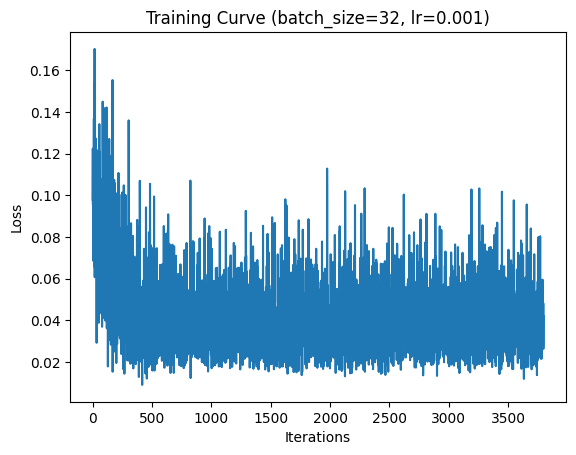

In [19]:
iters, losses = [], []

n=0
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)

        #print(outputs.shape)
        #print(labels.shape)
        outputs = outputs.view(len(inputs))
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(f'epoch {epoch + 1}, loss {loss:f}')
        iters.append(n)
        losses.append(float(loss)/batch_size) # compute *average* loss
        n +=1

print('Finished Training')

# plotting
plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate)) 
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [20]:
#PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)